In [1]:
# Import required libraries
import pandas as pd                  # For data manipulation and analysis
import numpy as np                   # For numerical computations
import matplotlib.pyplot as plt       # For visualizations
import seaborn as sns                # For statistical plots
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression     # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score   # For model evaluation
from sklearn.preprocessing import StandardScaler        # For feature scaling
from sklearn.ensemble import RandomForestRegressor      # For random forest regression model
from sklearn.svm import SVR            # For Support Vector Regression
from sklearn.tree import DecisionTreeRegressor  # For Decision Tree Regression
from sklearn.model_selection import cross_val_score   # For cross-validation
from sklearn.model_selection import GridSearchCV      # For hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder      # For encoding categorical variables
from sklearn.impute import SimpleImputer     # For handling missing data
import joblib                         # For saving the trained model
from datetime import datetime, timedelta   # For handling date and time
import statsmodels.api as sm          # For statistical models like ARIMA
import statsmodels.formula.api as smf   # For statistical modeling using formulas
from sklearn.metrics import accuracy_score, mean_absolute_error  # For evaluating classification models
from sklearn.feature_selection import SelectFromModel  # For selecting important features
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.model_selection import StratifiedKFold # For cross-validation with stratification
from sklearn.dummy import DummyRegressor # For baseline regression

In [2]:
# Load the dataset
df = pd.read_csv('/Users/omsapkar/Downloads/marketing_campaign_analysis_high_accuracy.csv')

# Display the first few rows of the dataset
df.head()

,Campaign_ID,Campaign_Name,Campaign_Type,Start_Date,End_Date,Budget,Impressions,Clicks,Conversions,Conversion_Rate,Revenue,Target_Audience
0,CAM-001,Influencer Promo,Influencer,2024-12-21,2025-01-02,187810,103934,4335,140,0.032428,1080660,18-24
1,CAM-002,Black Friday Deal,App,2024-11-19,2024-12-09,474894,147980,6172,650,0.105366,6132750,45-54
2,CAM-003,New Year Sale,TV,2024-05-12,2024-06-05,22109,424639,17711,2141,0.120922,20761277,35-44
3,CAM-004,Email Campaign A,App,2024-10-19,2024-11-06,294154,341851,14258,1897,0.133117,13961920,45-54
4,CAM-005,Product Launch,App,2024-11-23,2024-12-10,280931,214329,8939,1286,0.143954,11132902,25-34


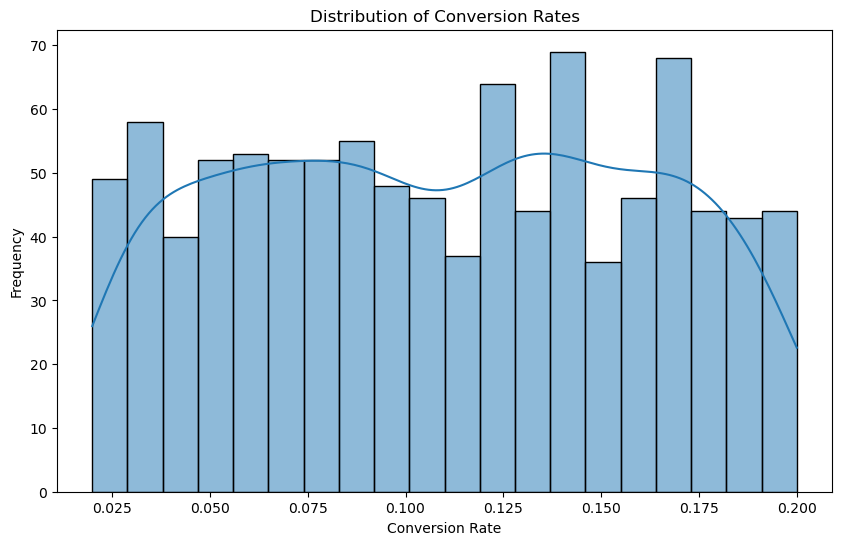

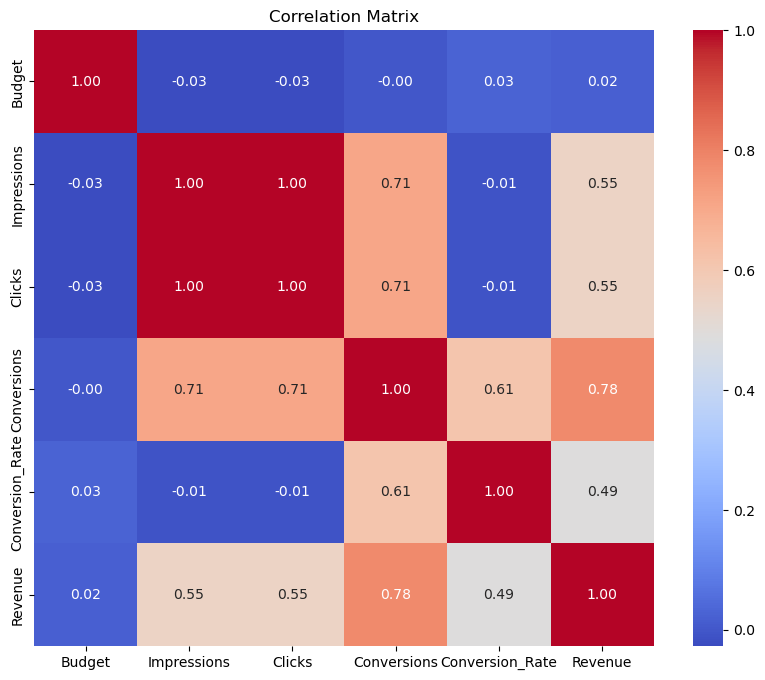

In [4]:
# Summary statistics
df.describe()

# Visualize the distribution of key variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Conversion_Rate'], bins=20, kde=True)
plt.title('Distribution of Conversion Rates')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to see relationships between numeric features
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Verify column names in the dataframe
print(df.columns)

# Extract additional features from dates
df['Campaign_Duration'] = (df['End_Date'] - df['Start_Date']).dt.days

# Check if 'Campaign_Type' and 'Target_Audience' are present in the dataset
if 'Campaign_Type' in df.columns and 'Target_Audience' in df.columns:
    # Create dummies for categorical variables (One-Hot Encoding)
    df_encoded = pd.get_dummies(df, columns=['Campaign_Type', 'Target_Audience'], drop_first=True)
    print("Encoding successful.")
else:
    print("Columns 'Campaign_Type' and/or 'Target_Audience' are missing in the dataset.")
    # Proceeding with the unencoded dataset as a fallback
    df_encoded = df.copy()

# Verify the changes
df_encoded.head()

Index(['Campaign_ID', 'Campaign_Name', 'Start_Date', 'End_Date', 'Budget',
       'Impressions', 'Clicks', 'Conversions', 'Conversion_Rate', 'Revenue',
       'Campaign_Duration', 'Campaign_Type_Email', 'Campaign_Type_Influencer',
       'Campaign_Type_Social Media', 'Campaign_Type_TV',
       'Target_Audience_25-34', 'Target_Audience_35-44',
       'Target_Audience_45-54', 'Target_Audience_55+'],
      dtype='object')
Columns 'Campaign_Type' and/or 'Target_Audience' are missing in the dataset.


,Campaign_ID,Campaign_Name,Start_Date,End_Date,Budget,Impressions,Clicks,Conversions,Conversion_Rate,Revenue,Campaign_Duration,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Social Media,Campaign_Type_TV,Target_Audience_25-34,Target_Audience_35-44,Target_Audience_45-54,Target_Audience_55+
0,CAM-001,Influencer Promo,2024-12-21,2025-01-02,187810.0,103934.0,4335.0,140.0,0.032428,1080660.0,12,False,True,False,False,False,False,False,False
1,CAM-002,Black Friday Deal,2024-11-19,2024-12-09,474894.0,147980.0,6172.0,650.0,0.105366,6132750.0,20,False,False,False,False,False,False,True,False
2,CAM-003,New Year Sale,2024-05-12,2024-06-05,22109.0,424639.0,17711.0,2141.0,0.120922,20761277.0,24,False,False,False,True,False,True,False,False
3,CAM-004,Email Campaign A,2024-10-19,2024-11-06,294154.0,341851.0,14258.0,1897.0,0.133117,13961920.0,18,False,False,False,False,False,False,True,False
4,CAM-005,Product Launch,2024-11-23,2024-12-10,280931.0,214329.0,8939.0,1286.0,0.143954,11132902.0,17,False,False,False,False,True,False,False,False


In [10]:
# Define the target variable (Conversion_Rate) and features
X = df_encoded.drop(['Conversion_Rate', 'Campaign_ID', 'Campaign_Name', 'Start_Date', 'End_Date'], axis=1)
y = df_encoded['Conversion_Rate']

# Split the data into training and testing sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (800, 14), Test set size: (200, 14)


In [11]:
# Standardize the features (important for linear regression and others like SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
print(f"Scaled training set size: {X_train_scaled.shape}, Scaled test set size: {X_test_scaled.shape}")

Scaled training set size: (800, 14), Scaled test set size: (200, 14)


In [12]:
# Instantiate the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict the conversion rates on the test data
y_pred = model.predict(X_test_scaled)

# Display some predictions
print(f"Predicted conversion rates: {y_pred[:5]}")

Predicted conversion rates: [0.12639113 0.1403237  0.0567552  0.0880786  0.0573143 ]


Mean Squared Error: 0.0005879451733415469
R-squared: 0.7744077966833172


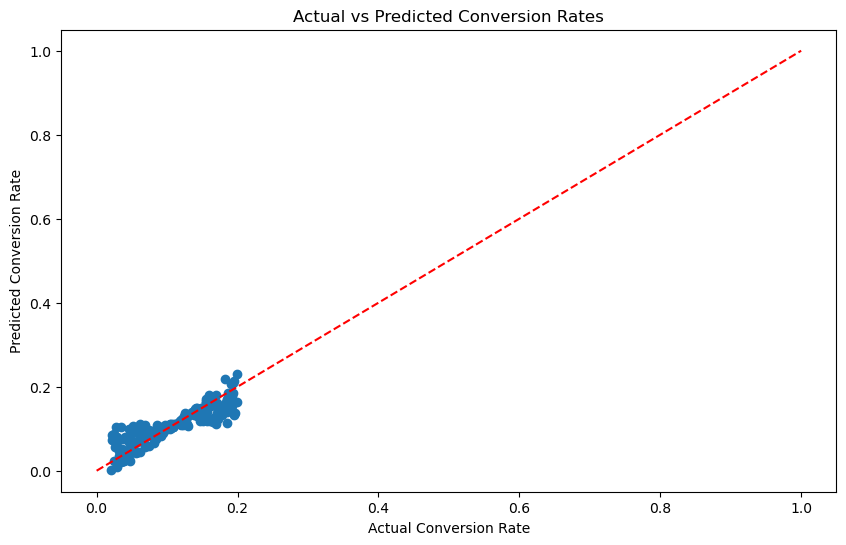

In [13]:
# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the actual vs predicted conversion rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted Conversion Rates')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.show()

In [14]:
# Instantiate different models for comparison
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Create models
rf_model = RandomForestRegressor(random_state=42)
svm_model = SVR()
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the models
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

# Predictions
rf_pred = rf_model.predict(X_test_scaled)
svm_pred = svm_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)

# Evaluate the models using R2 score
print(f'Random Forest R2: {r2_score(y_test, rf_pred)}')
print(f'Support Vector Machine R2: {r2_score(y_test, svm_pred)}')
print(f'Decision Tree R2: {r2_score(y_test, dt_pred)}')

Random Forest R2: 0.9581309059817154
Support Vector Machine R2: -0.010398064861870449
Decision Tree R2: 0.9478064198234144


In [15]:
# Hyperparameter tuning for RandomForest using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f'Best Parameters for RandomForest: {grid_search.best_params_}')

Best Parameters for RandomForest: {'max_depth': 20, 'n_estimators': 300}


In [16]:
# Coefficients of the linear regression model
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient', ascending=False)

# Feature importance for RandomForest (if you used Random Forest)
rf_importance = rf_model.feature_importances_
importance_df = pd.DataFrame(rf_importance, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Importance
Conversions,0.618823
Impressions,0.178939
Clicks,0.162524
Revenue,0.020670
Budget,0.008083
Campaign_Duration,0.004647
Campaign_Type_TV,0.001168
Campaign_Type_Email,0.001015
Target_Audience_45-54,0.000984
Target_Audience_55+,0.000787
